# LT Machine Learning

Analyze with auto-ML Laughing Together data

## 1. Import and prepare data

The data will have this format: 
- features:
    - for each participant and each interval, coherence for each channel combination (one value per channel combination - 10 in total, x 2 intervals - videos and interaction - so 20 in total)
    - liking pre (average of scores)
    - laughter group (laughter, control)
    - interaction group (interaction, control)
    - age
    - gender
- outcome:
    - liking post (average of scores)

### 1.1 General settings

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import os

# Set random seed for replicability
np.random.seed(42)

# Set coherence data folder
coherence_folder = "Z:/projects/LT/LT_adults/Carolina_analyses/fNIRS/data_prep/data"

# Set data folder where the rest is saved
data_path = "Y:/Documents/Projects/LT_machine_learning/Data"


### 1.2 Coherence data

#### 1.2.1 Coherence during videos

In [2]:
# load video data

video_filename = coherence_folder + "/Data_ROI_laughter_all.csv"
df = pd.read_csv(video_filename)

df.head()

,IFGr_IFGr,IFGr_IFGl,IFGr_TPJr,IFGr_TPJl,IFGl_IFGr,IFGl_IFGl,IFGl_TPJr,IFGl_TPJl,TPJr_IFGr,TPJr_IFGl,TPJr_TPJr,TPJr_TPJl,TPJl_IFGr,TPJl_IFGl,TPJl_TPJr,TPJl_TPJl,Interval,Pair,Group,Segment
0,0.253717,0.276044,0.258718,0.285384,0.249407,0.215108,0.214340,0.219691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,IC,laughter
1,0.231923,0.289607,0.239531,0.248008,0.232951,0.288870,0.260857,0.253972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,IC,laughter
2,NaN,0.229439,NaN,NaN,NaN,0.198435,NaN,NaN,NaN,0.211421,NaN,NaN,NaN,0.229041,NaN,NaN,1,2,IC,laughter
3,NaN,0.453068,NaN,NaN,NaN,0.422309,NaN,NaN,NaN,0.217067,NaN,NaN,NaN,0.174231,NaN,NaN,2,2,IC,laughter
4,0.288269,0.257061,0.267321,0.274450,0.352842,0.303648,0.305565,0.343827,0.187786,0.294686,0.193177,0.183882,0.194623,0.247054,0.233287,0.187955,1,3,IC,laughter


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IFGr_IFGr  177 non-null    float64
 1   IFGr_IFGl  190 non-null    float64
 2   IFGr_TPJr  155 non-null    float64
 3   IFGr_TPJl  162 non-null    float64
 4   IFGl_IFGr  184 non-null    float64
 5   IFGl_IFGl  197 non-null    float64
 6   IFGl_TPJr  160 non-null    float64
 7   IFGl_TPJl  167 non-null    float64
 8   TPJr_IFGr  155 non-null    float64
 9   TPJr_IFGl  168 non-null    float64
 10  TPJr_TPJr  133 non-null    float64
 11  TPJr_TPJl  141 non-null    float64
 12  TPJl_IFGr  148 non-null    float64
 13  TPJl_IFGl  161 non-null    float64
 14  TPJl_TPJr  127 non-null    float64
 15  TPJl_TPJl  135 non-null    float64
 16  Interval   199 non-null    int64  
 17  Pair       199 non-null    int64  
 18  Group      199 non-null    object 
 19  Segment    199 non-null    object 
dtypes: float64

In [4]:
# average redundant channels

# Create new dataframe including the variables to keep

video_temp = df[['Pair', 'Group', 'Segment', 'Interval', 'IFGr_IFGr', 'IFGl_IFGl', 'TPJr_TPJr', 'TPJl_TPJl']].copy()

# Define the ROI pairs and the columns to average
roi_pairs = [
    ('IFGl_IFGr', 'IFGr_IFGl'),
    ('IFGr_TPJr', 'TPJr_IFGr'),
    ('IFGr_TPJl', 'TPJl_IFGr'),
    ('IFGl_TPJr', 'TPJr_IFGl'),
    ('IFGl_TPJl', 'TPJl_IFGl'),
    ('TPJr_TPJl', 'TPJl_TPJr'),
]

# Iterate through the pairs and compute the mean for each one
for col1, col2 in roi_pairs:
    # Compute row-wise mean for the pair of columns
    video_temp[f'{col1}'] = df[[col1, col2]].mean(axis=1)

# Check the updated dataframe
video_temp.head()

,Pair,Group,Segment,Interval,IFGr_IFGr,IFGl_IFGl,TPJr_TPJr,TPJl_TPJl,IFGl_IFGr,IFGr_TPJr,IFGr_TPJl,IFGl_TPJr,IFGl_TPJl,TPJr_TPJl
0,1,IC,laughter,1,0.253717,0.215108,NaN,NaN,0.262726,0.258718,0.285384,0.214340,0.219691,NaN
1,1,IC,laughter,2,0.231923,0.288870,NaN,NaN,0.261279,0.239531,0.248008,0.260857,0.253972,NaN
2,2,IC,laughter,1,NaN,0.198435,NaN,NaN,0.229439,NaN,NaN,0.211421,0.229041,NaN
3,2,IC,laughter,2,NaN,0.422309,NaN,NaN,0.453068,NaN,NaN,0.217067,0.174231,NaN
4,3,IC,laughter,1,0.288269,0.303648,0.193177,0.187955,0.304951,0.227554,0.234536,0.300126,0.295440,0.208585


In [5]:
video_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pair       199 non-null    int64  
 1   Group      199 non-null    object 
 2   Segment    199 non-null    object 
 3   Interval   199 non-null    int64  
 4   IFGr_IFGr  177 non-null    float64
 5   IFGl_IFGl  197 non-null    float64
 6   TPJr_TPJr  133 non-null    float64
 7   TPJl_TPJl  135 non-null    float64
 8   IFGl_IFGr  199 non-null    float64
 9   IFGr_TPJr  179 non-null    float64
 10  IFGr_TPJl  176 non-null    float64
 11  IFGl_TPJr  195 non-null    float64
 12  IFGl_TPJl  193 non-null    float64
 13  TPJr_TPJl  154 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 21.9+ KB


In [6]:
# average across videos

video_data = video_temp.groupby(['Pair', 'Group']).agg(lambda x: x.mean() if x.dtype.kind in 'biufc' else x.iloc[0])

# Reset index to keep 'Pair' as a column
video_data = video_data.reset_index()

video_data = video_data.drop(["Interval"], axis = 1)

# Print result
print(video_data)



    Pair Group   Segment  IFGr_IFGr  IFGl_IFGl  TPJr_TPJr  TPJl_TPJl  \
0      1    IC  laughter   0.242820   0.251989        NaN        NaN   
1      1    IL  laughter   0.316864   0.282742   0.323639        NaN   
2      1   NIC  laughter   0.262333        NaN        NaN        NaN   
3      1   NIL  laughter        NaN   0.197958        NaN        NaN   
4      2    IC  laughter        NaN   0.310372        NaN        NaN   
..   ...   ...       ...        ...        ...        ...        ...   
95    25    IL  laughter   0.252782   0.226954   0.228621   0.268774   
96    25   NIC  laughter   0.230448   0.301274   0.202358   0.223243   
97    25   NIL  laughter   0.264882   0.334049   0.237661   0.244031   
98    26    IL  laughter   0.359190   0.271214        NaN   0.211764   
99    26   NIC  laughter   0.335721   0.332956        NaN   0.299954   

    IFGl_IFGr  IFGr_TPJr  IFGr_TPJl  IFGl_TPJr  IFGl_TPJl  TPJr_TPJl  
0    0.262002   0.249124   0.266696   0.237598   0.236831       

In [7]:
video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pair       100 non-null    int64  
 1   Group      100 non-null    object 
 2   Segment    100 non-null    object 
 3   IFGr_IFGr  91 non-null     float64
 4   IFGl_IFGl  99 non-null     float64
 5   TPJr_TPJr  70 non-null     float64
 6   TPJl_TPJl  71 non-null     float64
 7   IFGl_IFGr  100 non-null    float64
 8   IFGr_TPJr  93 non-null     float64
 9   IFGr_TPJl  92 non-null     float64
 10  IFGl_TPJr  98 non-null     float64
 11  IFGl_TPJl  98 non-null     float64
 12  TPJr_TPJl  81 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.3+ KB


#### 1.2.2 Coherence during free interaction

In [8]:
# load free interaction data

interaction_filename = coherence_folder + "/Data_ROI_interaction_all.csv"
df = pd.read_csv(interaction_filename)

df.head()

,IFGr_IFGr,IFGr_IFGl,IFGr_TPJr,IFGr_TPJl,IFGl_IFGr,IFGl_IFGl,IFGl_TPJr,IFGl_TPJl,TPJr_IFGr,TPJr_IFGl,TPJr_TPJr,TPJr_TPJl,TPJl_IFGr,TPJl_IFGl,TPJl_TPJr,TPJl_TPJl,Interval,Pair,Group,Segment
0,NaN,0.261954,0.229777,0.248250,NaN,0.234832,0.296894,0.306257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,IC,interaction
1,NaN,NaN,NaN,NaN,NaN,0.278682,0.259312,0.236873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,IC,interaction
2,NaN,0.225737,NaN,NaN,NaN,0.254043,NaN,NaN,NaN,0.281262,NaN,NaN,NaN,0.276343,NaN,NaN,1,2,IC,interaction
3,NaN,0.196668,NaN,NaN,NaN,0.221411,NaN,NaN,NaN,0.293187,NaN,NaN,NaN,0.200420,NaN,NaN,2,2,IC,interaction
4,0.238468,0.300067,0.213710,0.174938,0.227807,0.342319,0.262133,0.181897,0.244471,0.254158,0.190864,0.197932,0.261414,0.318280,0.255131,0.221397,1,3,IC,interaction


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IFGr_IFGr  137 non-null    float64
 1   IFGr_IFGl  156 non-null    float64
 2   IFGr_TPJr  125 non-null    float64
 3   IFGr_TPJl  134 non-null    float64
 4   IFGl_IFGr  147 non-null    float64
 5   IFGl_IFGl  171 non-null    float64
 6   IFGl_TPJr  137 non-null    float64
 7   IFGl_TPJl  150 non-null    float64
 8   TPJr_IFGr  131 non-null    float64
 9   TPJr_IFGl  146 non-null    float64
 10  TPJr_TPJr  114 non-null    float64
 11  TPJr_TPJl  126 non-null    float64
 12  TPJl_IFGr  126 non-null    float64
 13  TPJl_IFGl  140 non-null    float64
 14  TPJl_TPJr  105 non-null    float64
 15  TPJl_TPJl  121 non-null    float64
 16  Interval   194 non-null    int64  
 17  Pair       194 non-null    int64  
 18  Group      194 non-null    object 
 19  Segment    194 non-null    object 
dtypes: float64

In [10]:
# average redundant channels

# Create new dataframe including the variables to keep

interaction_temp = df[['Pair', 'Group', 'Segment', 'Interval', 'IFGr_IFGr', 'IFGl_IFGl', 'TPJr_TPJr', 'TPJl_TPJl']].copy()

# Define the ROI pairs and the columns to average
roi_pairs = [
    ('IFGl_IFGr', 'IFGr_IFGl'),
    ('IFGr_TPJr', 'TPJr_IFGr'),
    ('IFGr_TPJl', 'TPJl_IFGr'),
    ('IFGl_TPJr', 'TPJr_IFGl'),
    ('IFGl_TPJl', 'TPJl_IFGl'),
    ('TPJr_TPJl', 'TPJl_TPJr'),
]

# Iterate through the pairs and compute the mean for each one
for col1, col2 in roi_pairs:
    # Compute row-wise mean for the pair of columns
    interaction_temp[f'{col1}'] = df[[col1, col2]].mean(axis=1)


# Check the updated dataframe
interaction_temp.head()

,Pair,Group,Segment,Interval,IFGr_IFGr,IFGl_IFGl,TPJr_TPJr,TPJl_TPJl,IFGl_IFGr,IFGr_TPJr,IFGr_TPJl,IFGl_TPJr,IFGl_TPJl,TPJr_TPJl
0,1,IC,interaction,1,NaN,0.234832,NaN,NaN,0.261954,0.229777,0.248250,0.296894,0.306257,NaN
1,1,IC,interaction,2,NaN,0.278682,NaN,NaN,NaN,NaN,NaN,0.259312,0.236873,NaN
2,2,IC,interaction,1,NaN,0.254043,NaN,NaN,0.225737,NaN,NaN,0.281262,0.276343,NaN
3,2,IC,interaction,2,NaN,0.221411,NaN,NaN,0.196668,NaN,NaN,0.293187,0.200420,NaN
4,3,IC,interaction,1,0.238468,0.342319,0.190864,0.221397,0.263937,0.229090,0.218176,0.258146,0.250088,0.226531


In [11]:
interaction_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pair       194 non-null    int64  
 1   Group      194 non-null    object 
 2   Segment    194 non-null    object 
 3   Interval   194 non-null    int64  
 4   IFGr_IFGr  137 non-null    float64
 5   IFGl_IFGl  171 non-null    float64
 6   TPJr_TPJr  114 non-null    float64
 7   TPJl_TPJl  121 non-null    float64
 8   IFGl_IFGr  178 non-null    float64
 9   IFGr_TPJr  162 non-null    float64
 10  IFGr_TPJl  163 non-null    float64
 11  IFGl_TPJr  184 non-null    float64
 12  IFGl_TPJl  185 non-null    float64
 13  TPJr_TPJl  137 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 21.3+ KB


In [12]:
# average across segments

interaction_data = interaction_temp.groupby(['Pair', 'Group']).agg(lambda x: x.mean() if x.dtype.kind in 'biufc' else x.iloc[0])

# Reset index to keep 'Pair' as a column
interaction_data = interaction_data.reset_index()

interaction_data = interaction_data.drop(["Interval"], axis = 1)

# Print result
print(interaction_data)

    Pair Group      Segment  IFGr_IFGr  IFGl_IFGl  TPJr_TPJr  TPJl_TPJl  \
0      1    IC  interaction        NaN   0.256757        NaN        NaN   
1      1    IL  interaction   0.222519   0.314810        NaN        NaN   
2      1   NIC  interaction        NaN   0.270903        NaN        NaN   
3      1   NIL  interaction   0.354666   0.284653        NaN        NaN   
4      2    IC  interaction        NaN   0.237727        NaN        NaN   
..   ...   ...          ...        ...        ...        ...        ...   
92    25    IL  interaction   0.245774   0.294631   0.302060   0.340021   
93    25   NIC  interaction        NaN        NaN   0.286405   0.282845   
94    25   NIL  interaction        NaN   0.327829   0.233788   0.220164   
95    26    IL  interaction        NaN        NaN        NaN   0.258312   
96    26   NIC  interaction   0.251125   0.294287        NaN   0.298265   

    IFGl_IFGr  IFGr_TPJr  IFGr_TPJl  IFGl_TPJr  IFGl_TPJl  TPJr_TPJl  
0    0.261954   0.229777   0

In [13]:
interaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pair       97 non-null     int64  
 1   Group      97 non-null     object 
 2   Segment    97 non-null     object 
 3   IFGr_IFGr  74 non-null     float64
 4   IFGl_IFGl  90 non-null     float64
 5   TPJr_TPJr  62 non-null     float64
 6   TPJl_TPJl  65 non-null     float64
 7   IFGl_IFGr  92 non-null     float64
 8   IFGr_TPJr  86 non-null     float64
 9   IFGr_TPJl  85 non-null     float64
 10  IFGl_TPJr  95 non-null     float64
 11  IFGl_TPJl  94 non-null     float64
 12  TPJr_TPJl  73 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.0+ KB


#### 1.2.3 Merge coherence data in one dataframe

In [14]:
# append the two dataframes

# Set suffix
suffix_vid = "_vid"
suffix_int = "_int"

# Apply suffixes and drop "Segment" column
video_data = video_data.drop(columns=["Segment"]).add_suffix(suffix_vid)
interaction_data = interaction_data.drop(columns=["Segment"]).add_suffix(suffix_int)

# Keep "Group" and "Pair" column names consistent
video_data = video_data.rename(columns={f"Group{suffix_vid}": "Group", f"Pair{suffix_vid}": "Pair"})
interaction_data = interaction_data.rename(columns={f"Group{suffix_int}": "Group", f"Pair{suffix_int}": "Pair"})

# Merge DataFrames
coherence_data = pd.merge(video_data, interaction_data, on=["Group", "Pair"], how="inner")


coherence_data.head()

# save for later use
filename_data = data_path + "/coherence_data.csv"
coherence_data.to_csv(filename_data, index=True)

In [15]:
coherence_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pair           97 non-null     int64  
 1   Group          97 non-null     object 
 2   IFGr_IFGr_vid  90 non-null     float64
 3   IFGl_IFGl_vid  96 non-null     float64
 4   TPJr_TPJr_vid  69 non-null     float64
 5   TPJl_TPJl_vid  70 non-null     float64
 6   IFGl_IFGr_vid  97 non-null     float64
 7   IFGr_TPJr_vid  92 non-null     float64
 8   IFGr_TPJl_vid  91 non-null     float64
 9   IFGl_TPJr_vid  96 non-null     float64
 10  IFGl_TPJl_vid  96 non-null     float64
 11  TPJr_TPJl_vid  80 non-null     float64
 12  IFGr_IFGr_int  74 non-null     float64
 13  IFGl_IFGl_int  90 non-null     float64
 14  TPJr_TPJr_int  62 non-null     float64
 15  TPJl_TPJl_int  65 non-null     float64
 16  IFGl_IFGr_int  92 non-null     float64
 17  IFGr_TPJr_int  86 non-null     float64
 18  IFGr_TPJl_in

In [16]:
coherence_data.describe()

,Pair,IFGr_IFGr_vid,IFGl_IFGl_vid,TPJr_TPJr_vid,TPJl_TPJl_vid,IFGl_IFGr_vid,IFGr_TPJr_vid,IFGr_TPJl_vid,IFGl_TPJr_vid,IFGl_TPJl_vid,...,IFGr_IFGr_int,IFGl_IFGl_int,TPJr_TPJr_int,TPJl_TPJl_int,IFGl_IFGr_int,IFGr_TPJr_int,IFGr_TPJl_int,IFGl_TPJr_int,IFGl_TPJl_int,TPJr_TPJl_int
count,97.000000,90.000000,96.000000,69.000000,70.000000,97.000000,92.000000,91.000000,96.000000,96.000000,...,74.000000,90.000000,62.000000,65.000000,92.000000,86.000000,85.000000,95.000000,94.000000,73.000000
mean,13.206186,0.283953,0.277348,0.277366,0.275467,0.279035,0.277545,0.275068,0.270116,0.268653,...,0.272884,0.272239,0.284844,0.277152,0.277212,0.271925,0.276456,0.273638,0.276824,0.278305
std,7.455337,0.049587,0.034920,0.045296,0.048953,0.035316,0.035830,0.035348,0.030497,0.030634,...,0.049675,0.047217,0.049956,0.040598,0.039308,0.039980,0.037392,0.042493,0.035655,0.037719
min,1.000000,0.189117,0.197958,0.176283,0.181554,0.198344,0.204696,0.176341,0.208570,0.201636,...,0.170856,0.154268,0.185566,0.205472,0.180933,0.173479,0.171108,0.172113,0.204158,0.192117
25%,7.000000,0.253005,0.252533,0.239558,0.235220,0.257057,0.256633,0.254623,0.249956,0.246647,...,0.234664,0.240531,0.252202,0.256304,0.251540,0.249900,0.249048,0.246107,0.251044,0.254804
50%,13.000000,0.279192,0.280955,0.277489,0.279184,0.276877,0.276950,0.271392,0.269332,0.268938,...,0.270067,0.267357,0.283885,0.272354,0.269439,0.271058,0.275651,0.271389,0.272115,0.274747
75%,20.000000,0.313562,0.300963,0.310925,0.304925,0.297467,0.294675,0.296783,0.290379,0.286462,...,0.305142,0.299821,0.316232,0.292902,0.307286,0.291074,0.298309,0.291531,0.298581,0.302437
max,26.000000,0.426920,0.350262,0.396415,0.391693,0.373707,0.398961,0.407066,0.338134,0.348760,...,0.418941,0.392919,0.438462,0.452266,0.387538,0.382860,0.362487,0.399402,0.367865,0.383991


### 1.3 Questionnaire data

In [17]:
# load questionnaire data

questionnaire_filename = data_path + "/Excel_Auswertung_2(Franzi).xlsx"

sheet_names = pd.ExcelFile(questionnaire_filename).sheet_names
print(sheet_names)

['Participant Information', 'General information_v1', 'PANAS_v1', 'Handiness', 'BFI-10', 'Videos', 'PANAS_v2', 'Free Time Studie', 'Questions_v2', 'IOS']


#### 1.3.1 Participant Information

In [18]:
sheet_name = 'Participant Information'

# Load the specified sheet into a DataFrame
df = pd.read_excel(questionnaire_filename, sheet_name=sheet_name)

# get only relevant rows and columns
part_info = df.iloc[2:, 0:3]

# Rename the columns (headers)
part_info.columns = ['Participant', 'Age', 'Gender']

# convert Age to numeric
part_info['Age'] = pd.to_numeric(part_info['Age'], errors='coerce')

# convert Gender to categorical
part_info['Gender'] = part_info['Gender'].astype('category')

# Drop rows where 'Column 1' contains the letter 'P'
part_info = part_info[~part_info['Participant'].str.contains('P', case=False, na=False)]

# Drop rows where any column contains NaN
part_info = part_info.dropna(how='any')

# split group, pair number and participant label into three different columns
part_info[['Group', 'Pair', 'Participant']] = part_info['Participant'].str.extract(r'([A-Za-z]+)\s*(\d+)\s*([A-Za-z])')

# Reset the index
part_info.reset_index(drop=True, inplace=True)

part_info.head()

c:\Users\Admin\miniconda3\envs\env_wifiautogluon\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Participant,Age,Gender,Group,Pair
0,A,21.0,f,IL,01
1,B,18.0,f,IL,01
2,A,21.0,f,IL,02
3,B,18.0,f,IL,02
4,A,19.0,f,IL,03


#### 1.3.2 Liking_pre

In [19]:
sheet_name = 'General information_v1'

# Load the specified sheet into a DataFrame
df = pd.read_excel(questionnaire_filename, sheet_name=sheet_name)

# get only relevant rows and columns
df = df.iloc[4:, ]

# Set the first row as header and reset the dataframe
df.columns = df.iloc[0]  # Set first row as column headers
df = df.drop(4)  # Drop the first row, as it is now the header

# Rename the columns (headers)
df.columns = ['Participant', 'Comfort_Pre', 'Likeable_Pre', 'More_Time_Pre']

# convert scores to numeric
df[['Comfort_Pre', 'Likeable_Pre', 'More_Time_Pre']] = df[['Comfort_Pre', 'Likeable_Pre', 'More_Time_Pre']].apply(pd.to_numeric, errors = 'coerce')

# Drop rows where 'Column 1' contains the letter 'P'
df = df[~df['Participant'].str.contains('P', case=False, na=False)]

# Drop rows where any column contains NaN
df = df.dropna(how='any')

# Reset the index (optional)
df.reset_index(drop=True, inplace=True)

# split group, pair number and participant label into three different columns
df[['Group', 'Pair', 'Participant']] = df['Participant'].str.extract(r'([A-Za-z]+)\s*(\d+)\s*([A-Za-z])')

# create mean liking
df['Mean_liking_Pre'] = df[['Comfort_Pre', 'Likeable_Pre', 'More_Time_Pre']].mean(axis = 1)

df.head()

,Participant,Comfort_Pre,Likeable_Pre,More_Time_Pre,Group,Pair,Mean_liking_Pre
0,A,6.0,5.0,0.0,IL,01,3.666667
1,B,7.0,7.0,7.0,IL,01,7.000000
2,A,7.0,8.0,6.0,IL,02,7.000000
3,B,6.0,7.0,6.0,IL,02,6.333333
4,A,8.0,8.0,8.0,IL,03,8.000000


In [20]:
# drop unncecessary variables
# df = df.drop(['Comfort_Pre', 'Likeable_Pre', 'More_Time_Pre'], axis = 1)

# merge the two dataframes

part_info = pd.merge(part_info, df, on=["Participant", "Group", "Pair"], how="outer")

part_info.head()


,Participant,Age,Gender,Group,Pair,Comfort_Pre,Likeable_Pre,More_Time_Pre,Mean_liking_Pre
0,A,19.0,f,IC,01,8.0,8.0,8.0,8.000000
1,A,21.0,f,IC,02,8.0,7.0,7.0,7.333333
2,A,22.0,f,IC,03,7.0,7.0,6.0,6.666667
3,A,21.0,m,IC,04,7.0,6.0,3.0,5.333333
4,A,22.0,f,IC,05,6.0,7.0,7.0,6.666667


In [21]:
part_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Participant      204 non-null    object  
 1   Age              204 non-null    float64 
 2   Gender           204 non-null    category
 3   Group            204 non-null    object  
 4   Pair             204 non-null    object  
 5   Comfort_Pre      204 non-null    float64 
 6   Likeable_Pre     204 non-null    float64 
 7   More_Time_Pre    204 non-null    float64 
 8   Mean_liking_Pre  204 non-null    float64 
dtypes: category(1), float64(5), object(3)
memory usage: 13.2+ KB


#### 1.3.3 Liking_post

In [22]:
sheet_name = 'Questions_v2'

# Load the specified sheet into a DataFrame
df = pd.read_excel(questionnaire_filename, sheet_name=sheet_name)

# get only relevant rows and columns
df = df.iloc[3:, ]

# Set the first row as header and reset the dataframe
df.columns = df.iloc[0]  # Set first row as column headers
df = df.drop(3)  # Drop the first row, as it is now the header

# Rename the columns (headers)
df.columns = ['Participant', 'Comfort_Post', 'Likeable_Post', 'More_Time_Post']

# convert scores to numeric
df[['Comfort_Post', 'Likeable_Post', 'More_Time_Post']] = df[['Comfort_Post', 'Likeable_Post', 'More_Time_Post']].apply(pd.to_numeric, errors = 'coerce')

# Drop rows where 'Column 1' contains the letter 'P'
df = df[~df['Participant'].str.contains('P', case=False, na=False)]

# Drop rows where any column contains NaN
df = df.dropna(how='any')

# Reset the index (optional)
df.reset_index(drop=True, inplace=True)

# split group, pair number and participant label into three different columns
df[['Group', 'Pair', 'Participant']] = df['Participant'].str.extract(r'([A-Za-z]+)\s*(\d+)\s*([A-Za-z])')

# create mean liking
df['Mean_liking_Post'] = df[['Comfort_Post', 'Likeable_Post', 'More_Time_Post']].mean(axis = 1)

df.head()

,Participant,Comfort_Post,Likeable_Post,More_Time_Post,Group,Pair,Mean_liking_Post
0,A,6.0,6.0,0.0,IL,01,4.000000
1,B,7.0,7.0,7.0,IL,01,7.000000
2,A,7.0,8.0,4.0,IL,02,6.333333
3,B,7.0,7.0,7.0,IL,02,7.000000
4,A,8.0,8.0,6.0,IL,03,7.333333


In [23]:
# drop unncecessary variables
#df = df.drop(['Comfort_Post', 'Likeable_Post', 'More_Time_Post'], axis = 1)

# merge the two dataframes

part_info = pd.merge(part_info, df, on=["Participant", "Group", "Pair"], how="outer")

# convert Pair to numeric
part_info['Pair'] = pd.to_numeric(part_info['Pair'])

part_info.head()

,Participant,Age,Gender,Group,Pair,Comfort_Pre,Likeable_Pre,More_Time_Pre,Mean_liking_Pre,Comfort_Post,Likeable_Post,More_Time_Post,Mean_liking_Post
0,A,19.0,f,IC,1,8.0,8.0,8.0,8.000000,8.0,8.0,8.0,8.000000
1,A,21.0,f,IC,2,8.0,7.0,7.0,7.333333,8.0,8.0,8.0,8.000000
2,A,22.0,f,IC,3,7.0,7.0,6.0,6.666667,7.0,7.0,7.0,7.000000
3,A,21.0,m,IC,4,7.0,6.0,3.0,5.333333,8.0,4.0,1.0,4.333333
4,A,22.0,f,IC,5,6.0,7.0,7.0,6.666667,6.0,7.0,7.0,6.666667


In [24]:
part_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Participant       204 non-null    object  
 1   Age               204 non-null    float64 
 2   Gender            204 non-null    category
 3   Group             204 non-null    object  
 4   Pair              204 non-null    int64   
 5   Comfort_Pre       204 non-null    float64 
 6   Likeable_Pre      204 non-null    float64 
 7   More_Time_Pre     204 non-null    float64 
 8   Mean_liking_Pre   204 non-null    float64 
 9   Comfort_Post      204 non-null    float64 
 10  Likeable_Post     204 non-null    float64 
 11  More_Time_Post    204 non-null    float64 
 12  Mean_liking_Post  204 non-null    float64 
dtypes: category(1), float64(9), int64(1), object(2)
memory usage: 19.6+ KB


In [25]:
# save data for later use
filename_data = data_path + "/questionnaire_LT_data.csv"
df.to_csv(filename_data, index=True)

## 1.4 Merge all data

In [26]:
print("coherence Pair values:", coherence_data['Pair'].unique())
print("coherence_data Group values:", coherence_data['Group'].unique())
print("part_info Pair values:", part_info['Pair'].unique())
print("part_info Group values:", part_info['Group'].unique())

coherence Pair values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
coherence_data Group values: ['IC' 'IL' 'NIC' 'NIL']
part_info Pair values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
part_info Group values: ['IC' 'IL' 'NIC' 'NIL']


In [27]:
# merge the two dataframes

all_data = pd.merge(part_info, coherence_data, on=["Group", "Pair"], how="inner")

all_data.head()

,Participant,Age,Gender,Group,Pair,Comfort_Pre,Likeable_Pre,More_Time_Pre,Mean_liking_Pre,Comfort_Post,...,IFGr_IFGr_int,IFGl_IFGl_int,TPJr_TPJr_int,TPJl_TPJl_int,IFGl_IFGr_int,IFGr_TPJr_int,IFGr_TPJl_int,IFGl_TPJr_int,IFGl_TPJl_int,TPJr_TPJl_int
0,A,19.0,f,IC,1,8.0,8.0,8.0,8.000000,8.0,...,NaN,0.256757,NaN,NaN,0.261954,0.229777,0.248250,0.278103,0.271565,NaN
1,A,21.0,f,IC,2,8.0,7.0,7.0,7.333333,8.0,...,NaN,0.237727,NaN,NaN,0.211202,NaN,NaN,0.287224,0.238382,NaN
2,A,22.0,f,IC,3,7.0,7.0,6.0,6.666667,7.0,...,0.251327,0.342319,0.226159,0.24193,0.287347,0.270499,0.256507,0.258972,0.237202,0.249038
3,A,21.0,m,IC,4,7.0,6.0,3.0,5.333333,8.0,...,0.352007,0.265415,0.260695,0.23675,0.269789,0.294033,0.311451,0.297521,0.344174,0.264295
4,A,22.0,f,IC,5,6.0,7.0,7.0,6.666667,6.0,...,0.234199,0.282587,NaN,NaN,0.243539,0.278947,NaN,0.399402,NaN,NaN


In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Participant       194 non-null    object  
 1   Age               194 non-null    float64 
 2   Gender            194 non-null    category
 3   Group             194 non-null    object  
 4   Pair              194 non-null    int64   
 5   Comfort_Pre       194 non-null    float64 
 6   Likeable_Pre      194 non-null    float64 
 7   More_Time_Pre     194 non-null    float64 
 8   Mean_liking_Pre   194 non-null    float64 
 9   Comfort_Post      194 non-null    float64 
 10  Likeable_Post     194 non-null    float64 
 11  More_Time_Post    194 non-null    float64 
 12  Mean_liking_Post  194 non-null    float64 
 13  IFGr_IFGr_vid     180 non-null    float64 
 14  IFGl_IFGl_vid     192 non-null    float64 
 15  TPJr_TPJr_vid     138 non-null    float64 
 16  TPJl_TPJl_vid     140 non-

## 1.5 Clean and explore data

In [29]:
# Set pair and participant as indexes

all_data['combined'] = all_data['Group'] + all_data['Pair'].astype(str) + '_' + all_data['Participant'].astype(str)

all_data.set_index('combined', inplace=True)

# divide group into two variables: laughter_group (0,1) and interaction_group(0,1)
all_data['laughter_group'] = (all_data['Group'].str.contains('L', case=False, na=False))
all_data['interaction_group'] = (~all_data['Group'].str.contains('N', case=False, na=False))

# drop unnecessary variables
all_data = all_data.drop(['Participant', 'Pair', 'Group'], axis = 1)


# Display the updated DataFrame with multi-index
all_data.sample(5)


,Age,Gender,Comfort_Pre,Likeable_Pre,More_Time_Pre,Mean_liking_Pre,Comfort_Post,Likeable_Post,More_Time_Post,Mean_liking_Post,...,TPJr_TPJr_int,TPJl_TPJl_int,IFGl_IFGr_int,IFGr_TPJr_int,IFGr_TPJl_int,IFGl_TPJr_int,IFGl_TPJl_int,TPJr_TPJl_int,laughter_group,interaction_group
combined,,,,,,,,,,,,,,,,,,,,,
IL18_B,19.0,f,8.0,8.0,4.0,6.666667,6.0,8.0,4.0,6.000000,...,NaN,0.273027,0.280088,NaN,0.341142,0.296766,0.316797,0.239654,True,True
IC17_A,24.0,f,8.0,8.0,8.0,8.000000,8.0,8.0,8.0,8.000000,...,NaN,NaN,0.302008,0.251218,0.319114,0.277697,0.367865,NaN,False,True
NIC18_B,23.0,m,6.0,6.0,6.0,6.000000,6.0,6.0,6.0,6.000000,...,0.235277,0.296677,0.205237,0.173479,0.225148,0.240860,0.268813,0.254804,False,False
NIL9_A,24.0,f,5.0,5.0,4.0,4.666667,5.0,5.0,2.0,4.000000,...,0.360289,0.307282,0.263830,0.287181,0.294908,0.336699,0.325498,0.264867,True,False
NIC3_A,23.0,f,5.0,6.0,7.0,6.000000,7.0,6.0,7.0,6.666667,...,NaN,NaN,0.306844,0.265687,0.288749,0.286212,0.311999,NaN,False,False


In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, IC1_A to NIL9_B
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                194 non-null    float64 
 1   Gender             194 non-null    category
 2   Comfort_Pre        194 non-null    float64 
 3   Likeable_Pre       194 non-null    float64 
 4   More_Time_Pre      194 non-null    float64 
 5   Mean_liking_Pre    194 non-null    float64 
 6   Comfort_Post       194 non-null    float64 
 7   Likeable_Post      194 non-null    float64 
 8   More_Time_Post     194 non-null    float64 
 9   Mean_liking_Post   194 non-null    float64 
 10  IFGr_IFGr_vid      180 non-null    float64 
 11  IFGl_IFGl_vid      192 non-null    float64 
 12  TPJr_TPJr_vid      138 non-null    float64 
 13  TPJl_TPJl_vid      140 non-null    float64 
 14  IFGl_IFGr_vid      194 non-null    float64 
 15  IFGr_TPJr_vid      184 non-null    float64 
 16  IFGr_T

In [31]:
# save data for later use
filename_data = data_path + "/all_LT_data.csv"
all_data.to_csv(filename_data, index=True)

#### 1.5.1 Eliminate all rows with missing data

In [32]:
# Drop rows where any column contains NaN
all_data = all_data.dropna(how='any')

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, IC3_A to NIL9_B
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                82 non-null     float64 
 1   Gender             82 non-null     category
 2   Comfort_Pre        82 non-null     float64 
 3   Likeable_Pre       82 non-null     float64 
 4   More_Time_Pre      82 non-null     float64 
 5   Mean_liking_Pre    82 non-null     float64 
 6   Comfort_Post       82 non-null     float64 
 7   Likeable_Post      82 non-null     float64 
 8   More_Time_Post     82 non-null     float64 
 9   Mean_liking_Post   82 non-null     float64 
 10  IFGr_IFGr_vid      82 non-null     float64 
 11  IFGl_IFGl_vid      82 non-null     float64 
 12  TPJr_TPJr_vid      82 non-null     float64 
 13  TPJl_TPJl_vid      82 non-null     float64 
 14  IFGl_IFGr_vid      82 non-null     float64 
 15  IFGr_TPJr_vid      82 non-null     float64 
 16  IFGr_TP

In [33]:
all_data.head()

,Age,Gender,Comfort_Pre,Likeable_Pre,More_Time_Pre,Mean_liking_Pre,Comfort_Post,Likeable_Post,More_Time_Post,Mean_liking_Post,...,TPJr_TPJr_int,TPJl_TPJl_int,IFGl_IFGr_int,IFGr_TPJr_int,IFGr_TPJl_int,IFGl_TPJr_int,IFGl_TPJl_int,TPJr_TPJl_int,laughter_group,interaction_group
combined,,,,,,,,,,,,,,,,,,,,,
IC3_A,22.0,f,7.0,7.0,6.0,6.666667,7.0,7.0,7.0,7.000000,...,0.226159,0.241930,0.287347,0.270499,0.256507,0.258972,0.237202,0.249038,False,True
IC4_A,21.0,m,7.0,6.0,3.0,5.333333,8.0,4.0,1.0,4.333333,...,0.260695,0.236750,0.269789,0.294033,0.311451,0.297521,0.344174,0.264295,False,True
IC6_A,22.0,f,6.0,7.0,6.0,6.333333,5.0,6.0,7.0,6.000000,...,0.254169,0.282219,0.248479,0.262694,0.245007,0.322261,0.320386,0.281943,False,True
IC9_A,20.0,f,6.0,6.0,4.0,5.333333,7.0,7.0,6.0,6.666667,...,0.280089,0.235602,0.262514,0.222739,0.225102,0.313162,0.278158,0.321085,False,True
IC12_A,22.0,m,6.0,7.0,6.0,6.333333,7.0,7.0,6.0,6.666667,...,0.260205,0.331693,0.314116,0.268103,0.247415,0.305061,0.259701,0.310181,False,True


In [34]:
all_data.index

Index(['IC3_A', 'IC4_A', 'IC6_A', 'IC9_A', 'IC12_A', 'IC13_A', 'IC14_A',
       'IC16_A', 'IC21_A', 'IC22_A', 'IC23_A', 'IC25_A', 'IL2_A', 'IL6_A',
       'IL11_A', 'IL12_A', 'IL13_A', 'IL15_A', 'IL16_A', 'IL20_A', 'IL21_A',
       'IL25_A', 'NIC14_A', 'NIC17_A', 'NIC23_A', 'NIC24_A', 'NIC5_A',
       'NIL10_A', 'NIL11_A', 'NIL12_A', 'NIL16_A', 'NIL17_A', 'NIL18_A',
       'NIL20_A', 'NIL21_A', 'NIL23_A', 'NIL24_A', 'NIL3_A', 'NIL5_A',
       'NIL8_A', 'NIL9_A', 'IC3_B', 'IC4_B', 'IC6_B', 'IC9_B', 'IC12_B',
       'IC13_B', 'IC14_B', 'IC16_B', 'IC21_B', 'IC22_B', 'IC23_B', 'IC25_B',
       'IL2_B', 'IL6_B', 'IL11_B', 'IL12_B', 'IL13_B', 'IL15_B', 'IL16_B',
       'IL20_B', 'IL21_B', 'IL25_B', 'NIC14_B', 'NIC17_B', 'NIC23_B',
       'NIC24_B', 'NIC5_B', 'NIL10_B', 'NIL11_B', 'NIL12_B', 'NIL16_B',
       'NIL17_B', 'NIL18_B', 'NIL20_B', 'NIL21_B', 'NIL23_B', 'NIL24_B',
       'NIL3_B', 'NIL5_B', 'NIL8_B', 'NIL9_B'],
      dtype='object', name='combined')

In [35]:
all_data.index.nunique()

82

### 1.5.2. Exploratory data analisys

Summary Statistics:
             Age  Comfort_Pre  Likeable_Pre  More_Time_Pre  Mean_liking_Pre  \
count  82.000000    82.000000     82.000000      82.000000        82.000000   
mean   22.036585     6.390244      6.231707       4.865854         5.829268   
std     1.952808     1.051232      1.136366       1.463652         1.024051   
min    18.000000     4.000000      3.000000       0.000000         2.666667   
25%    20.000000     6.000000      6.000000       4.000000         5.333333   
50%    22.000000     6.000000      6.000000       5.000000         6.000000   
75%    24.000000     7.000000      7.000000       6.000000         6.333333   
max    25.000000     8.000000      8.000000       8.000000         8.000000   

       Comfort_Post  Likeable_Post  More_Time_Post  Mean_liking_Post  \
count     82.000000      82.000000       82.000000         82.000000   
mean       6.536585       6.500000        5.048780          6.028455   
std        1.056375       1.259532        1.684369  

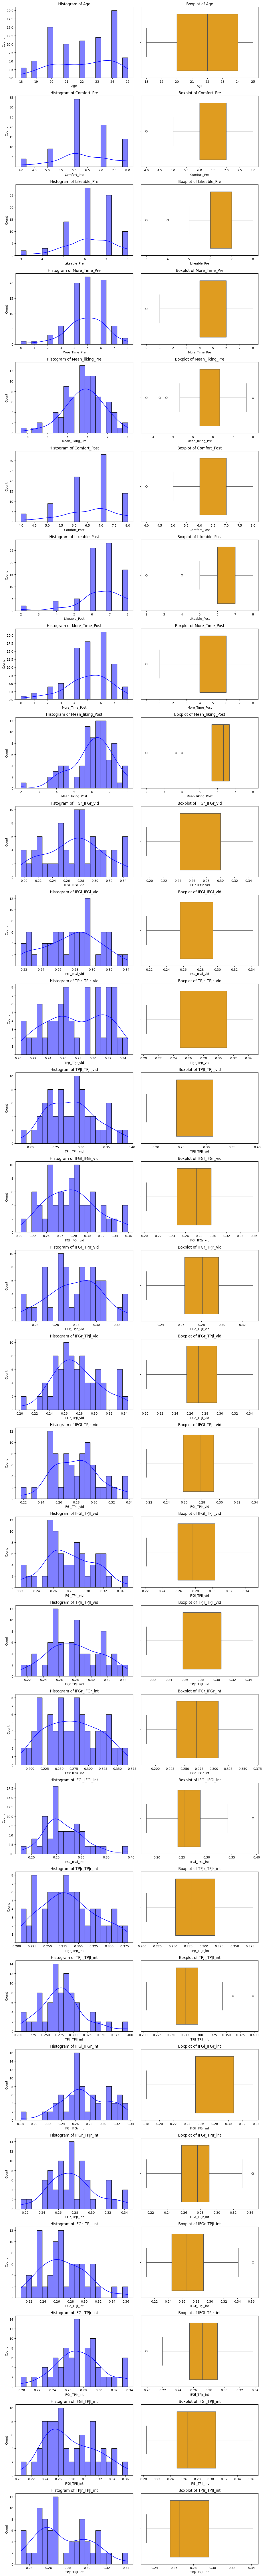


Correlation Matrix:
                       Age  Comfort_Pre  Likeable_Pre  More_Time_Pre  \
Age               1.000000     0.113237      0.096273       0.062209   
Comfort_Pre       0.113237     1.000000      0.595128       0.507846   
Likeable_Pre      0.096273     0.595128      1.000000       0.575617   
More_Time_Pre     0.062209     0.507846      0.575617       1.000000   
Mean_liking_Pre   0.103996     0.804265      0.847773       0.863117   
Comfort_Post     -0.039557     0.587317      0.553350       0.446365   
Likeable_Post     0.143051     0.354316      0.677107       0.425248   
More_Time_Post    0.085778     0.365623      0.529372       0.723799   
Mean_liking_Post  0.082150     0.488633      0.676383       0.646542   
IFGr_IFGr_vid    -0.013341    -0.083777     -0.056179      -0.130155   
IFGl_IFGl_vid     0.126493    -0.157443     -0.255581      -0.264801   
TPJr_TPJr_vid    -0.001795    -0.168057     -0.090547      -0.166250   
TPJl_TPJl_vid     0.018255    -0.124575    

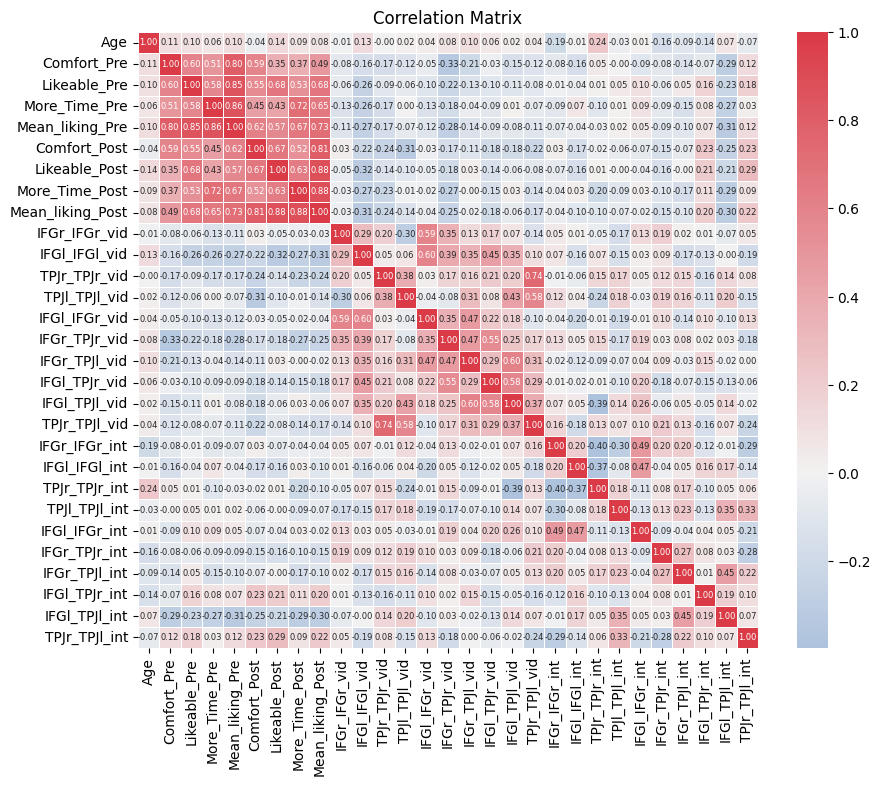

In [61]:
# 1️⃣ Summary statistics
def summary_stats(df):
    print("Summary Statistics:")
    print(df.describe())  # Summary stats for numeric columns
    print("\nMissing values:")
    print(df.isnull().sum())  # Count missing values
    print("\nData Types:")
    print(df.dtypes)  # Data types for each column

# 2️⃣ Distribution plots (Histogram and Boxplot for each variable)
def distribution_plots(df, save_path):
    # Create a figure with multiple subplots
    num_cols = len(df.select_dtypes(include=np.number).columns)
    fig, axes = plt.subplots(num_cols, 2, figsize=(12, num_cols * 4))
    axes = axes.flatten()

    for idx, col in enumerate(df.select_dtypes(include=np.number).columns):
        sns.histplot(df[col], kde=True, ax=axes[2*idx], color='blue', bins=20)
        axes[2*idx].set_title(f'Histogram of {col}')
        
        sns.boxplot(data=df, x=col, ax=axes[2*idx + 1], color='orange')
        axes[2*idx + 1].set_title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.savefig(save_path + "_distribution_plots.png")
    plt.show()

# 3️⃣ Correlation Matrix and Heatmap
def correlation_matrix(df, save_path):
    numeric_data = df.select_dtypes(include=np.number)
    corr = numeric_data.corr()
    print("\nCorrelation Matrix:")
    print(corr)
    
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap=cmap, center=0, fmt='.2f', linewidths=0.5, annot_kws={"size": 6})
    plt.title('Correlation Matrix')
    plt.savefig(save_path + "_heatmap.png")
    plt.show()

# Main function to call the EDA steps
def perform_eda(df, save_path):
    if not os.path.exists('save_path'):
        os.makedirs('save_path')
    summary_stats(df)
    distribution_plots(df, save_path)
    correlation_matrix(df, save_path)


save_path = "Y:/Documents/Projects/LT_machine_learning/Data/EDA_plots"
perform_eda(all_data, save_path)


## 2. Auto ML

### 2.1 Predict mean liking

#### 2.1.1 Create test and train data

In [39]:
from sklearn.model_selection import train_test_split

# Load data
#all_data = pd.read_csv(filename_data)

data = all_data.drop(['Comfort_Pre', 'Likeable_Pre', 'More_Time_Pre', 'Comfort_Post', 'Likeable_Post', 'More_Time_Post'], axis = 1)

# Shuffle and split the dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)  # 80% train, 20% test

# Check the resulting shapes
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (65, 26)
Test data shape: (17, 26)


#### 2.1.2 AutoGluon regressor

In [40]:
model_path = "Y:\Documents\Projects\LT_machine_learning\Models\Liking_post"  # Replace this with the desired folder path

from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label="Mean_liking_Post",
                             eval_metric="mean_absolute_percentage_error", path = model_path).fit(train_data, time_limit=500, )

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Admin\AppData\Local\Temp\ipykernel_24124\4286754749.py:1: SyntaxWarning: invalid escape sequence '\D'
  model_path = "Y:\Documents\Projects\LT_machine_learning\Models\Liking_post"  # Replace this with the desired folder path
c:\Users\Admin\miniconda3\envs\env_wifiautogluon\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.8
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          12
Memory Avail:       19.36 GB / 31.71 GB (61.0%)
Disk Space Avail:   6.26 GB / 9.77 GB (64.1%)
	We recommend a minimum available disk space of 10 GB, an

[1000]	valid_set's l2: 1.02963	valid_set's mean_absolute_percentage_error: -0.157454


	-0.1571	 = Validation score   (-mean_absolute_percentage_error)
	3.04s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 492.92s of the 492.92s of remaining time.


[1000]	valid_set's l2: 0.996997	valid_set's mean_absolute_percentage_error: -0.158316


	-0.1539	 = Validation score   (-mean_absolute_percentage_error)
	1.05s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 491.28s of the 491.28s of remaining time.
	-0.138	 = Validation score   (-mean_absolute_percentage_error)
	0.54s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 489.20s of the 489.20s of remaining time.
	-0.1588	 = Validation score   (-mean_absolute_percentage_error)
	2.64s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 485.47s of the 485.47s of remaining time.
	-0.1542	 = Validation score   (-mean_absolute_percentage_error)
	0.5s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 483.23s of the 483.23s of remaining time.
Metric mean_absolute_percentage_error is not supported by this model - using mean_squared_error instead
	-0.1709	

In [41]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.121217,mean_absolute_percentage_error,0.018005,4.912558,0.001000,0.064213,2,True,12
1,XGBoost,-0.124444,mean_absolute_percentage_error,0.004007,0.974022,0.004007,0.974022,1,True,9
2,RandomForestMSE,-0.138042,mean_absolute_percentage_error,0.039405,0.539106,0.039405,0.539106,1,True,5
3,LightGBMLarge,-0.150523,mean_absolute_percentage_error,0.004001,0.700903,0.004001,0.700903,1,True,11
4,LightGBM,-0.153938,mean_absolute_percentage_error,0.004994,1.047472,0.004994,1.047472,1,True,4
5,ExtraTreesMSE,-0.154157,mean_absolute_percentage_error,0.040679,0.498980,0.040679,0.498980,1,True,7
6,LightGBMXT,-0.157129,mean_absolute_percentage_error,0.003995,3.040520,0.003995,3.040520,1,True,3
7,CatBoost,-0.158844,mean_absolute_percentage_error,0.003032,2.639243,0.003032,2.639243,1,True,6
8,KNeighborsDist,-0.161712,mean_absolute_percentage_error,0.006971,0.026510,0.006971,0.026510,1,True,2
9,KNeighborsUnif,-0.164624,mean_absolute_percentage_error,0.258031,2.573017,0.258031,2.573017,1,True,1


#### 2.1.3 Test the model

In [42]:
from autogluon.tabular import TabularPredictor
pred = TabularPredictor.load(model_path)

In [43]:
preds = pred.predict( test_data, model="WeightedEnsemble_L2" )
preds

combined
NIL16_A    5.693637
IC3_A      6.983427
NIC14_A    4.755847
NIL17_A    6.863016
IL16_A     4.831315
NIL11_A    5.599026
IC23_A     6.216898
IL2_B      6.152707
IC12_A     6.262926
IL2_A      6.678916
IC21_B     7.309090
NIL20_A    6.814936
NIL10_B    6.319678
NIL23_A    5.408551
NIL11_B    6.039626
IC12_B     6.472328
NIL21_B    7.043713
Name: Mean_liking_Post, dtype: float32

In [44]:
metrics_data = pred.evaluate_predictions(test_data["Mean_liking_Post"], preds)
metrics_data

{'mean_absolute_percentage_error': -0.10796436008733017,
 'root_mean_squared_error': -0.8229305924165916,
 'mean_squared_error': -0.6772147599351224,
 'mean_absolute_error': -0.7121021607342888,
 'r2': 0.021424671893748304,
 'pearsonr': 0.5473146241483433,
 'median_absolute_error': -0.8149356842041016}

#### 2.1.4 Create baseline prediction for comparison

In [45]:
# as baseline, calculate mepa if the model always predicted the mean of "Mean_liking_Post"
baseline_mape = -abs(((test_data["Mean_liking_Post"] - test_data["Mean_liking_Post"].mean())/test_data["Mean_liking_Post"])*100).mean()/100
print(f"{baseline_mape=}%")


baseline_mape=-0.09737575008981697%


#### 2.1.5 Visualize the model

In [46]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor.load(model_path)
path_to_png = predictor.plot_ensemble_model()
path_to_png

'Y:\\Documents\\Projects\\LT_machine_learning\\Models\\Liking_post\\ensemble_model.png'

#### 2.1.6 Calculate feature importance

In [47]:
feature_importances = pred.feature_importance(test_data, model="WeightedEnsemble_L2", num_shuffle_sets=10)
feature_importances

Computing feature importance via permutation shuffling for 25 features using 17 rows with 10 shuffle sets...


	74.3s	= Expected runtime (7.43s per shuffle set)
	2.45s	= Actual runtime (Completed 10 of 10 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
IFGl_TPJl_int,0.006990,0.005153,0.001010,10,0.012286,0.001695
TPJr_TPJr_vid,0.002718,0.001686,0.000324,10,0.004450,0.000985
Gender,0.002379,0.002291,0.004742,10,0.004733,0.000024
TPJr_TPJl_int,0.002118,0.001950,0.003724,10,0.004122,0.000114
laughter_group,0.001752,0.001255,0.000844,10,0.003042,0.000462
TPJl_TPJl_int,0.001127,0.002106,0.062409,10,0.003292,-0.001037
interaction_group,0.001095,0.000881,0.001731,10,0.002001,0.000189
IFGl_IFGl_vid,0.001043,0.000991,0.004406,10,0.002061,0.000025
TPJr_TPJl_vid,0.000723,0.000311,0.000022,10,0.001042,0.000403
TPJr_TPJr_int,0.000432,0.001035,0.109649,10,0.001496,-0.000632


### 2.2 Predict desire to spend more time

This variable has greater variance as compared to mean liking, so the baseline procedure will hopefully not yield such a low mape

#### 2.2.1 Create test and train data

In [48]:
from sklearn.model_selection import train_test_split

# Load data
#all_data = pd.read_csv(filename_data)

data = all_data.drop(['Comfort_Pre', 'Likeable_Pre', 'Mean_liking_Pre', 'Comfort_Post', 'Likeable_Post', 'Mean_liking_Post'], axis = 1)

# Shuffle and split the dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)  # 80% train, 20% test

# Check the resulting shapes
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (65, 26)
Test data shape: (17, 26)


#### 2.1.2 AutoGluon regressor

In [50]:
model_path = "Y:\Documents\Projects\LT_machine_learning\Models\Time_post"  # Replace this with the desired folder path

from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label="More_Time_Post",
                             eval_metric="mean_absolute_percentage_error", path = model_path).fit(train_data, time_limit=500, )

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Admin\AppData\Local\Temp\ipykernel_24124\608303598.py:1: SyntaxWarning: invalid escape sequence '\D'
  model_path = "Y:\Documents\Projects\LT_machine_learning\Models\Time_post"  # Replace this with the desired folder path
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.8
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          12
Memory Avail:       18.86 GB / 31.71 GB (59.5%)
Disk Space Avail:   6.26 GB / 9.77 GB (64.1%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabul

In [51]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.294575,mean_absolute_percentage_error,0.003966,0.811944,0.000000,0.063622,2,True,12
1,LightGBMXT,-0.294575,mean_absolute_percentage_error,0.003966,0.748322,0.003966,0.748322,1,True,3
2,LightGBM,-0.295131,mean_absolute_percentage_error,0.003999,0.557252,0.003999,0.557252,1,True,4
3,KNeighborsUnif,-0.320275,mean_absolute_percentage_error,0.005956,0.032675,0.005956,0.032675,1,True,1
4,XGBoost,-0.325240,mean_absolute_percentage_error,0.003999,0.571306,0.003999,0.571306,1,True,9
5,RandomForestMSE,-0.331429,mean_absolute_percentage_error,0.043664,0.513312,0.043664,0.513312,1,True,5
6,LightGBMLarge,-0.338982,mean_absolute_percentage_error,0.004969,1.037049,0.004969,1.037049,1,True,11
7,ExtraTreesMSE,-0.340811,mean_absolute_percentage_error,0.044787,0.492657,0.044787,0.492657,1,True,7
8,NeuralNetTorch,-0.348726,mean_absolute_percentage_error,0.005968,0.283469,0.005968,0.283469,1,True,10
9,NeuralNetFastAI,-0.349880,mean_absolute_percentage_error,0.005990,0.496686,0.005990,0.496686,1,True,8


#### 2.1.3 Test the model

In [53]:
from autogluon.tabular import TabularPredictor
pred = TabularPredictor.load(model_path)

preds = pred.predict( test_data, model="WeightedEnsemble_L2" )

metrics_data = pred.evaluate_predictions(test_data["More_Time_Post"], preds)
metrics_data

{'mean_absolute_percentage_error': -0.22479659712949052,
 'root_mean_squared_error': -1.6151352508909014,
 'mean_squared_error': -2.608661878670415,
 'mean_absolute_error': -1.3461712809169994,
 'r2': -0.847802164058211,
 'pearsonr': 0.22880736969771232,
 'median_absolute_error': -1.3448338508605957}

#### 2.1.4 Create baseline prediction for comparison

In [55]:
# as baseline, calculate mepa if the model always predicted the mean of "Mean_liking_Post"
baseline_mape = -abs(((test_data["More_Time_Post"] - test_data["More_Time_Post"].mean())/test_data["More_Time_Post"])*100).mean()/100
print(f"{baseline_mape=}%")

baseline_mape=-0.15462184873949578%


#### 2.1.5 Visualize the model

In [56]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor.load(model_path)
path_to_png = predictor.plot_ensemble_model()
path_to_png

'Y:\\Documents\\Projects\\LT_machine_learning\\Models\\Time_post\\ensemble_model.png'

#### 2.1.6 Calculate feature importance

In [57]:
feature_importances = pred.feature_importance(test_data, model="WeightedEnsemble_L2", num_shuffle_sets=10)
feature_importances

Computing feature importance via permutation shuffling for 25 features using 17 rows with 10 shuffle sets...
	20.93s	= Expected runtime (2.09s per shuffle set)
	0.96s	= Actual runtime (Completed 10 of 10 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
More_Time_Pre,0.030568,0.022329,0.000954,10,0.053515,0.007621
TPJr_TPJr_vid,0.008313,0.006145,0.001028,10,0.014627,0.001998
TPJr_TPJr_int,0.005728,0.007337,0.017821,10,0.013268,-0.001812
IFGl_TPJl_int,0.004511,0.003725,0.002015,10,0.008339,0.000683
TPJr_TPJl_int,0.001131,0.004393,0.218277,10,0.005646,-0.003384
TPJr_TPJl_vid,0.000813,0.000843,0.006910,10,0.001680,-0.000054
IFGr_TPJl_vid,0.000685,0.001747,0.123061,10,0.002480,-0.001110
TPJl_TPJl_int,0.000219,0.001772,0.352698,10,0.002040,-0.001603
IFGr_IFGr_vid,0.000067,0.000749,0.391318,10,0.000837,-0.000702
IFGr_IFGr_int,0.000000,0.000000,0.500000,10,0.000000,0.000000
